# Pandas Exercises

## Creating DataFrames and Using Sample Data Sets

This is the Jupyter Notebook runnable exercises version of the article, [Pandas Practice Questions – Fifty-Two Examples to Make You an Expert](https://codesolid.com/pandas-practice-questions-twenty-one-examples-to-make-you-an-expert/).

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb

**1.** Using NumPy, create a Pandas DataFrame with five rows and three columms:

In [4]:
df=pd.DataFrame(np.random.randn(5,3))
print(df)

          0         1         2
0 -0.261718 -1.839431 -2.132105
1 -0.804793  0.535662  1.655508
2  0.177837  0.054233  1.232133
3  0.983140 -0.868060  0.002954
4 -1.227364 -2.086997 -1.037168


**2.** For a Pandas DataFrame created from a NumPy array, what is the default behavior for the labels for the columns?  For the rows?

Default labels for columns and rows is set as 0,1,2---

**3.** Create a second DataFrame as above with five rows and three columns, setting the row labels to the names of any five major US cities and the column labels to the first three months of the year.

In [7]:
df=pd.DataFrame(np.random.randn(5,3))
df.index=("New York","Los Angeles","Chicago","Houston","Philadelphia")
df.columns=("January","February","March")
print(df)

               January  February     March
New York     -0.370278 -1.762411  0.532649
Los Angeles   0.519186 -1.682561  0.145337
Chicago      -1.412892  0.557703 -1.964233
Houston      -1.781661 -0.091481 -0.224218
Philadelphia  1.537785 -1.373505 -0.911074


**4.** You recall that the Seaborn package has some data sets built in, but can't remember how to list and load them. Assuming the functions to do so have "data" in the name, how might you locate them?  You can assume a Jupyter Notebook / IPython environment and explain the process, or write the code to do it in Python.

In [ ]:
data=sns.load_dataset("")

## Loading data from CSV

**5**. Zillow home data is available at this URL: https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv

Open this file as a DataFrame named df_homes in Pandas.

In [11]:
df_homes = pd.read_csv('data.csv')


2


**6.** Save the DataFrame, df_homes, to a local CSV file, "zillow_home_data.csv".  

In [12]:
df_homes.to_csv('zillow_home_data.csv')

**7.** Load zillow_home_data.csv back into a new Dataframe, df_homes_2

In [13]:
df_homes_2 = pd.read_csv('zillow_home_data.csv')


2


**8.** Compare the dimensions of the two DataFrames, df_homes and df_homes_2.  Are they equal?  If not, how can you fix it?

In [14]:
df_homes_dim=df_homes.ndim
print(df_homes_dim)
df_homes_2_dim=df_homes_2.ndim

print(df_homes_2_dim)

2
2


The dimensions of df_homes and df_homes_2 are equal.

**9.** A remote spreadsheet showing how a snapshot of how traffic increased for a hypothetical website is available here: https://github.com/CodeSolid/CodeSolid.github.io/raw/main/booksource/data/AnalyticsSnapshot.xlsx. Load the worksheet page of the spreasheet data labelled "February 2022" as a DataFrame named "feb".  Note: the leftmost column in the spreadsheet is the index column.

In [23]:
feb=pd.read_excel('AnalyticsSnapshot.xlsx',sheet_name='February 2022',index_col=0)
print(feb)

            This Month  Last Month  Month to Month Increase
Users             1800         280                 5.428571
New Users         1700         298                 4.704698
Page Views        2534         436                 4.811927


**10.** The "Month to Month Increase" column is a bit hard to understand, so ignore it for now.  Given the values for "This Month" and "Last Month", create a new column, "Percentage Increase".

In [24]:

pincrease=[]
for i in range(len(feb['This Month'])):
  pincrease=(feb['This Month'][i]-feb['Last Month'][i])/feb['Last Month'][i]*100
feb['Percentage Increase']=pincrease
print(feb)

            This Month  Last Month  Month to Month Increase  \
Users             1800         280                 5.428571   
New Users         1700         298                 4.704698   
Page Views        2534         436                 4.811927   

            Percentage Increase  
Users                481.192661  
New Users            481.192661  
Page Views           481.192661  


<ipython-input-24-f5bc8e8be33e>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pincrease=(feb['This Month'][i]-feb['Last Month'][i])/feb['Last Month'][i]*100


## Basic Operations on Data

**11.** Using Seaborn, get a dataset about penguins into a dataframe named "df_penguins".  Note that because all of the following questions depend on this example, we'll provide the solution here so no one gets stuck:

In [26]:
df_penguins = sb.load_dataset('penguins')

**12.** Write the code to show the the number of rows and columns in df_penguins

In [28]:
shape=df_penguins.shape
print(shape)

(344, 7)


**13.** How might you show the first few rows of df_penguins?

In [29]:
df_penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


**14.** How can you return the unique species of penguins from df_penguins?  How many unique species are there?

In [31]:
uniquespecies= df_penguins['species'].unique()
print(uniquespecies)
print(len(uniquespecies))

['Adelie' 'Chinstrap' 'Gentoo']
3


**15.** What function can we use to drop the rows that have missing data?

In [32]:
df_penguins.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


**16.** By default, will this modify df_penguins or will it return a copy?

By default, it returns a copy

**17.** How can we override the default?

By passing inplace=False to dropna()

**18.** Create a new DataFrame, df_penguins_full, with the missing data deleted.

In [34]:
df_penguins_full=df_penguins.dropna()
print(df_penguins_full)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

**19.** What is the average bill length of a penguin, in millimeters, in this (df_full) data set?

In [35]:
mean=df_penguins_full['bill_length_mm'].mean()
print(mean)

43.99279279279279


**20.** Which of the following is most strongly correlated with bill length?  a) Body mass?  b) Flipper length?  c) Bill depth?  Show how you arrived at the answer.

Strongest correlation with Flipper length as it has highest Pearson correlation coefficient

In [37]:
corrbm=df_penguins_full['bill_length_mm'].corr(df_penguins_full['body_mass_g'])
print(corrbm)
corrfl=df_penguins_full['bill_length_mm'].corr(df_penguins_full['flipper_length_mm'])
print(corrfl)
corrbd=df_penguins_full['bill_length_mm'].corr(df_penguins_full['bill_depth_mm'])
print(corrbd)

0.589451110176949
0.6530956386670856
-0.22862563591302934


**21.** How could you show the median flipper length, grouped by species?

In [38]:
flipperlength=df_penguins_full.groupby('species')['flipper_length_mm'].median()
print(flipperlength)

species
Adelie       190.0
Chinstrap    196.0
Gentoo       216.0
Name: flipper_length_mm, dtype: float64


**22.** Which species has the longest flippers?

Gentoo has the longest flippers

In [39]:
maxfl=df_penguins_full.groupby('species')['flipper_length_mm'].max()
print(maxfl)

species
Adelie       210.0
Chinstrap    212.0
Gentoo       231.0
Name: flipper_length_mm, dtype: float64


**23.** Which two species have the most similar mean weight?  Show how you arrived at the answer.

Adelie and Chinstrap have the most similar mean weight

In [40]:
meanbm=df_penguins_full.groupby('species')['body_mass_g'].mean()
print(meanbm)

species
Adelie       3706.164384
Chinstrap    3733.088235
Gentoo       5092.436975
Name: body_mass_g, dtype: float64


**24.** How could you sort the rows by bill length?

In [41]:
df_penguins_full.sort_values(by='bill_length_mm')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
142,Adelie,Dream,32.1,15.5,188.0,3050.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
92,Adelie,Dream,34.0,17.1,185.0,3400.0,Female
18,Adelie,Torgersen,34.4,18.4,184.0,3325.0,Female
...,...,...,...,...,...,...,...
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,Female


**25.** How could you run the same sort in descending order?

In [43]:
df_penguins_full.sort_values(by='bill_length_mm',ascending=False)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,Female
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
...,...,...,...,...,...,...,...
18,Adelie,Torgersen,34.4,18.4,184.0,3325.0,Female
92,Adelie,Dream,34.0,17.1,185.0,3400.0,Female
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female


**26.** How could you sort by species first, then by body mass?

In [46]:
byspecies=df_penguins_full.sort_values(by='species')

bymass=byspecies.sort_values(by='body_mass_g')
print(bymass)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
190  Chinstrap      Dream            46.9           16.6              192.0   
64      Adelie     Biscoe            36.4           17.1              184.0   
58      Adelie     Biscoe            36.5           16.6              181.0   
54      Adelie     Biscoe            34.5           18.1              187.0   
116     Adelie  Torgersen            38.6           17.0              188.0   
..         ...        ...             ...            ...                ...   
299     Gentoo     Biscoe            45.2           16.4              223.0   
337     Gentoo     Biscoe            48.8           16.2              222.0   
297     Gentoo     Biscoe            51.1           16.3              220.0   
253     Gentoo     Biscoe            59.6           17.0              230.0   
237     Gentoo     Biscoe            49.2           15.2              221.0   

     body_mass_g     sex  
190       2700.0  Female

## Selecting Rows, Columns, and Cells

Let's look at some precious stones now, and leave the poor penguins alone for a while.  Let's look at some precious stones now, and leave the poor penguins alone for a while.  

**27.** Load the Seaborn "diamonds" dataset into a Pandas dataframe named diamonds.

In [57]:
diamonds = sb.load_dataset('diamonds')


       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


**28.** Display the columns that are available.

In [50]:
print(diamonds.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


**29.** If you select a single column from the diamonds DataFrame, what will be the type of the return value?

Series

**30.** Select the 'table' column and show its type

In [56]:
print(diamonds.dtypes['table'])

float64


**31.** Select the first ten rows of the price and carat columns ten rows of the diamonds DataFrame into a variable called subset, and display them.

In [58]:
subset=diamonds.loc[0:9,['price','carat']]
print(subset)

   price  carat
0    326   0.23
1    326   0.21
2    327   0.23
3    334   0.29
4    335   0.31
5    336   0.24
6    336   0.24
7    337   0.26
8    337   0.22
9    338   0.23


**32.** For a given column, show the code to display the datatype of the _values_ in the column?  

In [60]:
print(diamonds.dtypes['carat'])

float64


**33.** Select the first row of the diamonds DataFrame into a variable called row.

In [61]:
row=diamonds.iloc[0]
print(row)

carat       0.23
cut        Ideal
color          E
clarity      SI2
depth       61.5
table       55.0
price        326
x           3.95
y           3.98
z           2.43
Name: 0, dtype: object


**34.** What would you expect the data type of the row to be?  Display it.

A Pandas series
but instead it is object as values of different dataypes are stored in the series

In [65]:
print(row.dtypes)

object


**35.** Can you discover the names of the columns using only the row returned in #33?  Why or why not?Can you discover the names of the columns using only the row returned in #33?  Why or why not?

Yes, because a row series should have the columns as the index (See below):

In [67]:
print(row.index)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


**36.** Select the row with the highest priced diamond.

In [68]:
print(diamonds[diamonds.price == diamonds.price.max()])

       carat      cut color clarity  depth  table  price    x     y     z
27749   2.29  Premium     I     VS2   60.8   60.0  18823  8.5  8.47  5.16


**37.** Select the row with the lowest priced diamond.

In [69]:
print(diamonds[diamonds.price == diamonds.price.min()])

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31


## Some Exercises Using Time Series

**38.** Load the taxis dataset into a DataFrame, ```taxis```.

In [71]:
taxis=sb.load_dataset('taxis')
print(taxis)

                  pickup             dropoff  passengers  distance  fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
1    2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0   
2    2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5   
3    2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0   
4    2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0   
...                  ...                 ...         ...       ...   ...   
6428 2019-03-31 09:51:53 2019-03-31 09:55:27           1      0.75   4.5   
6429 2019-03-31 17:38:00 2019-03-31 18:34:23           1     18.74  58.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   
6431 2019-03-04 10:09:25 2019-03-04 10:14:29           1      1.12   6.0   
6432 2019-03-13 19:31:22 2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total   color      payment            pickup_zone  \
0     2.15    0

**39.** The 'pickup' column contains the date and time the customer picked up, but it's a string.  Add a column to the DataFrame, 'pickup_time', containing the value in 'pickup' as a DateTime.

In [73]:
import datetime
taxis['pickup_time']=pd.to_datetime(taxis['pickup'])
print(taxis)

                  pickup             dropoff  passengers  distance  fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
1    2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0   
2    2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5   
3    2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0   
4    2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0   
...                  ...                 ...         ...       ...   ...   
6428 2019-03-31 09:51:53 2019-03-31 09:55:27           1      0.75   4.5   
6429 2019-03-31 17:38:00 2019-03-31 18:34:23           1     18.74  58.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   
6431 2019-03-04 10:09:25 2019-03-04 10:14:29           1      1.12   6.0   
6432 2019-03-13 19:31:22 2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total   color      payment            pickup_zone  \
0     2.15    0

**40.** We have a hypothesis that as the day goes on, the tips get higher.  We'll need to wrangle the data a bit before testing this, however.  First, now that we have a datetime column, pickup_time, create a subset of it to create a new DataFrame, taxis_one_day. This new DataFrame should have values between '2019-03-23 00:06:00' (inclusive) and '2019-03-24 00:00:00' (exlusive).

In [74]:
taxis_one_day=taxis[(taxis['pickup_time']>='2019-03-23 00:06:00') & (taxis['pickup_time']<'2019-03-24 00:00:00')]
print(taxis_one_day)

                  pickup             dropoff  passengers  distance  fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
8    2019-03-23 11:48:50 2019-03-23 12:06:14           1      3.63  15.0   
17   2019-03-23 20:50:49 2019-03-23 21:02:07           1      2.60  10.5   
117  2019-03-23 09:39:25 2019-03-23 09:56:45           0      3.60  15.5   
144  2019-03-23 18:35:01 2019-03-23 18:47:39           1      3.20  12.5   
...                  ...                 ...         ...       ...   ...   
6325 2019-03-23 20:52:40 2019-03-23 21:10:12           1      3.62  14.5   
6331 2019-03-23 11:27:00 2019-03-23 12:20:11           1      7.67  28.0   
6338 2019-03-23 18:05:38 2019-03-23 18:25:36           1      2.82  14.0   
6427 2019-03-23 18:26:09 2019-03-23 18:49:12           1      7.07  20.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   

       tip  tolls  total   color      payment                     pickup_zone  \
0     

**41.** We now have a range from morning until midnight, but we to take the mean of the numeric columns, grouped at one hour intervals.  Save the result as df_means, and display it.

In [81]:


numeric_columns = taxis_one_day.select_dtypes(include=[np.number]).columns
df_means = taxis_one_day.groupby(pd.Grouper(key='pickup_time', freq='H'))[numeric_columns].mean()
print(df_means)

                     passengers  distance       fare       tip     tolls  \
pickup_time                                                                
2019-03-23 00:00:00    1.000000  1.911667   8.583333  1.415000  0.000000   
2019-03-23 01:00:00    1.250000  1.325000   7.875000  1.525000  0.000000   
2019-03-23 02:00:00    1.727273  1.739091   8.181818  1.641818  0.000000   
2019-03-23 03:00:00    1.500000  3.377500  11.750000  2.410000  0.000000   
2019-03-23 04:00:00    2.000000  0.950000   5.500000  0.915000  0.000000   
2019-03-23 05:00:00    2.000000  1.270000   6.000000  0.980000  0.000000   
2019-03-23 06:00:00    1.000000  0.400000  21.500000  0.000000  0.000000   
2019-03-23 07:00:00    2.333333  0.980000   5.250000  1.165000  0.000000   
2019-03-23 08:00:00    1.000000  0.020000   2.500000  0.000000  0.000000   
2019-03-23 09:00:00    1.500000  1.352000   7.400000  1.674000  0.000000   
2019-03-23 10:00:00    1.000000  1.760000   8.750000  0.727500  0.000000   
2019-03-23 1

<ipython-input-81-91e772459f1d>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_means = taxis_one_day.groupby(pd.Grouper(key='pickup_time', freq='H'))[numeric_columns].mean()


**42.** Create a simple line plot of the value "distance".  

<Axes: xlabel='pickup_time', ylabel='distance'>

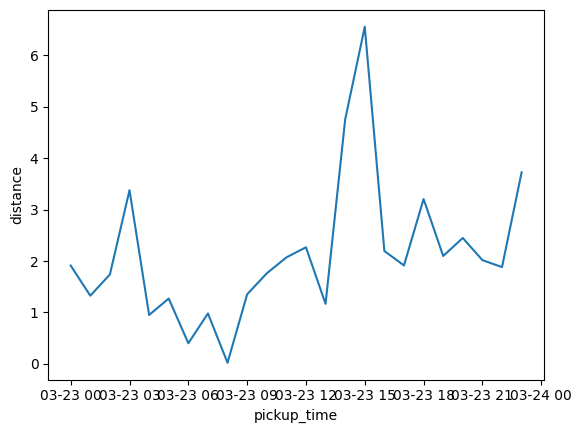

In [80]:
sb.lineplot(data=df_means,x='pickup_time',y='distance')

**43.** Overall, do riders travel further or less far as the day progresses?

They travel more far as the day progresses

**44.** Create a new column in taxis_means, ```tip_in_percent```.  The source columns for this should be "fare" and "tip"

In [82]:
df_means['tip_in_percent']=df_means['tip']/df_means['fare']*100
print(df_means)

                     passengers  distance       fare       tip     tolls  \
pickup_time                                                                
2019-03-23 00:00:00    1.000000  1.911667   8.583333  1.415000  0.000000   
2019-03-23 01:00:00    1.250000  1.325000   7.875000  1.525000  0.000000   
2019-03-23 02:00:00    1.727273  1.739091   8.181818  1.641818  0.000000   
2019-03-23 03:00:00    1.500000  3.377500  11.750000  2.410000  0.000000   
2019-03-23 04:00:00    2.000000  0.950000   5.500000  0.915000  0.000000   
2019-03-23 05:00:00    2.000000  1.270000   6.000000  0.980000  0.000000   
2019-03-23 06:00:00    1.000000  0.400000  21.500000  0.000000  0.000000   
2019-03-23 07:00:00    2.333333  0.980000   5.250000  1.165000  0.000000   
2019-03-23 08:00:00    1.000000  0.020000   2.500000  0.000000  0.000000   
2019-03-23 09:00:00    1.500000  1.352000   7.400000  1.674000  0.000000   
2019-03-23 10:00:00    1.000000  1.760000   8.750000  0.727500  0.000000   
2019-03-23 1

**45.** Create a new column, time_interval, as a range of integer values beginning with zero.

In [83]:
df_means['time_interval']=range(len(df_means))
print(df_means)

                     passengers  distance       fare       tip     tolls  \
pickup_time                                                                
2019-03-23 00:00:00    1.000000  1.911667   8.583333  1.415000  0.000000   
2019-03-23 01:00:00    1.250000  1.325000   7.875000  1.525000  0.000000   
2019-03-23 02:00:00    1.727273  1.739091   8.181818  1.641818  0.000000   
2019-03-23 03:00:00    1.500000  3.377500  11.750000  2.410000  0.000000   
2019-03-23 04:00:00    2.000000  0.950000   5.500000  0.915000  0.000000   
2019-03-23 05:00:00    2.000000  1.270000   6.000000  0.980000  0.000000   
2019-03-23 06:00:00    1.000000  0.400000  21.500000  0.000000  0.000000   
2019-03-23 07:00:00    2.333333  0.980000   5.250000  1.165000  0.000000   
2019-03-23 08:00:00    1.000000  0.020000   2.500000  0.000000  0.000000   
2019-03-23 09:00:00    1.500000  1.352000   7.400000  1.674000  0.000000   
2019-03-23 10:00:00    1.000000  1.760000   8.750000  0.727500  0.000000   
2019-03-23 1

Display the correlations between the following pairs of values:
1. tip_in_percent and distance.
1. tip_in_percent and passengers.
1. tip_in_percent and time_interval.

In [84]:
corrtd=df_means['tip_in_percent'].corr(df_means['distance'])
print(corrtd)
corrtd=df_means['tip_in_percent'].corr(df_means['passengers'])
print(corrtd)
corrtt=df_means['tip_in_percent'].corr(df_means['time_interval'])
print(corrtt)

0.00953302789086911
0.32623184018268747
-0.23239795213315184


**47.** Admittedly, the size of the data set is fairly small given how we've subsetted it.  But based on the values in #45, which of the three pairs show the strongest correlation.

Strongest correlation is between tip in percent and number of passengers.

**48.** Did our hypothesis that people tip more as the day goes on turn out to be warranted?

No, the hypothesis is not warranted.